# RESUMO DATA SCIENCE

# Distribuição T Student
- Para casos de amostra de até 30
- Graus de liberdade : n-1
- Usar tabela Z "T Student"

- cdf : para esquerda da Distribuição
- sf : para direita da Distribuição


In [1]:
# Importação da função para fazer o teste
from scipy.stats import t

Média de salário dos cientistas de dados = R$ 75,00 por hora
Amostra com 9 funcionários e desvio padrão = 10

In [2]:
# Qual a probabilidade de selecionar um cientista de dados e o salário ser menor que R$ 80 por hora
t.cdf(1.5, 8)

0.9139983540240443

In [ ]:
# Qual a probabilidade do salário ser maior do que 80?
t.sf(1.5, 8)

In [ ]:
# Somatório da execução dos dois códigos acima (lado esquerdo + lado direito da distribuição)
t.cdf(1.5, 8) + t.sf(1.5, 8)

# DISTRIBUIÇÃO  Binomial                    
- Discreta
- Eventos que tem q ter carct
- num fixo de experimento
- possibilidade de sucesso ou fracasso
- eventos independentes

- pmf = prob pontual
- cdf = prob acumulativa

In [ ]:
# Importação da função binom
from scipy.stats import binom

In [ ]:
# Jogar uma moeda 5 vezes, qual a probabilidade de dar cara 3 vezes?
# eventos , experimentos, probabilidades
prob = binom.pmf(3, 5, 0.5)
prob

In [ ]:
# Passar por 4 sinais de 4 tempos, qual a probabilidade de pegar sinal verde
# nenhuma, 1, 2, 3 ou 4 vezes seguidas?
binom.pmf(0, 4, 0.25) + binom.pmf(1, 4, 0.25)

In [ ]:
# E se forem sinais de dois tempos?
binom.pmf(4, 4, 0.5)

In [ ]:
# Probabilidade acumulativa
binom.cdf(4, 4, 0.25)

In [ ]:
# Concurso com 12 questões, qual a probabilidade de acertar 7 questões considerando
# que cada questão tem 4 alternativas?
binom.pmf(7, 12, 0.25) 

# Distribuição de Poisson
- Mede a prob da ocorrencia em prob de tempo
- cada evento deve ser independente

- pontual : pmf
- acumulativa: cdf (esquerda)
- maior que: sf (direito)

In [3]:
# Importação da função
from scipy.stats import poisson

In [ ]:
# Média de acidentes de carro é 2 por dia

In [4]:
# Qual a probabilidade de ocorrerem 3 acidentes no dia?
poisson.pmf(3, 2)

0.18044704431548356

In [5]:
# Qual a probabilidade de ocorrerem 3 ou menos acidentes no dia?
poisson.cdf(3, 2)

0.857123460498547

In [6]:
# Qual a probabilidade de ocorrerem mais de 3 acidentes no dia?
poisson.sf(3, 2)

0.14287653950145296

In [7]:
poisson.cdf(3, 2) + poisson.sf(3, 2)

1.0

# Distribuição Qui Quadrado
- Teste de Hipotese
- Se existe diferença significativa
- Baseado em cálculo de proporção

In [8]:
# Importação das funções, chi2_contingency porque temos 2 categorias
import numpy as np
from scipy.stats import chi2_contingency

In [9]:
# Criação da matriz com os dados e execução do teste
novela = np.array([[19, 6], [43, 32]])
novela

array([[19,  6],
       [43, 32]])

In [10]:
#segundo valor é o pvalue
#Valor de p é maior que 0,05 não há evidências de diferença significativa (hipótese nula): não há diferença significativa
chi2_contingency(novela)

(2.037351443123939,
 0.15347667161786666,
 1,
 array([[15.5,  9.5],
        [46.5, 28.5]]))

In [ ]:
# Não tem evidencia contra a hipotese nula. Ou seja, há mais mulheres que assistem novelas do que homens

In [11]:
novela2 = np.array([[22, 3], [43, 32]])
novela2

array([[22,  3],
       [43, 32]])

In [12]:
#agora valor de p menor que 0,05, podemos rejeitar a hipótese nula em favor da hipótese alternativa: há diferença significativa
chi2_contingency(novela2)

(6.461538461538461,
 0.011023416388221425,
 1,
 array([[16.25,  8.75],
        [48.75, 26.25]]))

In [ ]:
# p-value 0.011 < 0.05 Há diferença significativa, a favor da hipotese alternativa

DISTRIBUIÇÃO DE ANOVA / TURKEY
- Analise de variancia
- Identifica se há diferença significativa , mas não aonde. Para saber aonde utiliza-se o TURKEY 

In [2]:
# Importação das bibliotecas
import pandas as pd #para importar o arquivo
from scipy import stats
import statsmodels.api as sm #anova
from statsmodels.formula.api import ols # regressão linear
from statsmodels.stats.multicomp import MultiComparison #turkey

In [4]:
# Carregamento da base de dados
tratamento = pd.read_csv('anova.csv', sep = ';')
tratamento.head()
tratamento

,Sexo,Remedio,Horas
0,F,A,5
1,F,A,10
2,F,A,7
3,F,A,7
4,M,A,7
5,M,A,6
6,M,A,9
7,M,A,9
8,F,B,5
9,F,B,5


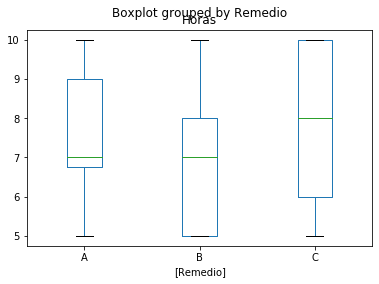

In [5]:
# Boxplot agrupando os dados pelo remédio
tratamento.boxplot(by = 'Remedio', grid = False)

In [6]:
# Criação do modelo de regressão linear e execução do teste
modelo1 = ols('Horas ~ Remedio', data = tratamento).fit()
resultados1 = sm.stats.anova_lm(modelo1)
# Observar valor de p maior que 0,05 (Pr(>F)) Hipótese nula de que não há diferença significativa
resultados1

,df,sum_sq,mean_sq,F,PR(>F)
Remedio,2.0,4.083333,2.041667,0.537618,0.591966
Residual,21.0,79.750000,3.797619,NaN,NaN


In [7]:
# Criação do segundo modelo utilizando mais atributos e execução do teste
modelo2 = ols('Horas ~ Remedio * Sexo', data = tratamento).fit()
resultados2 = sm.stats.anova_lm(modelo2)
#Nenhum valor de P mostra diferença significativa
resultados2

,df,sum_sq,mean_sq,F,PR(>F)
Remedio,2.0,4.083333,2.041667,0.532609,0.596042
Sexo,1.0,4.166667,4.166667,1.086957,0.310948
Remedio:Sexo,2.0,6.583333,3.291667,0.858696,0.440360
Residual,18.0,69.000000,3.833333,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B   -0.625 0.7861 -3.0803 1.8303  False
     A      C    0.375    0.9 -2.0803 2.8303  False
     B      C      1.0 0.5668 -1.4553 3.4553  False
---------------------------------------------------


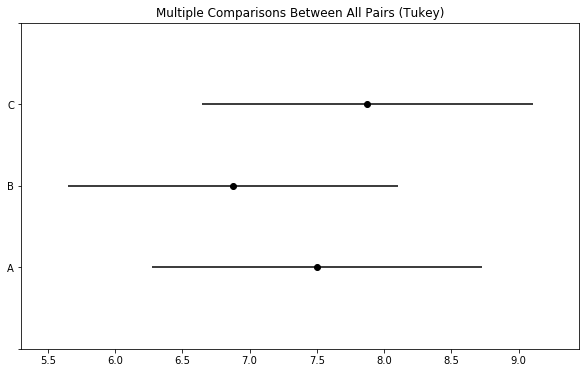

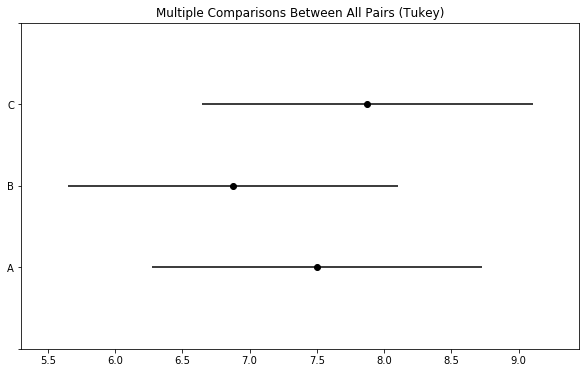

In [8]:
#Se houver diferença o teste de Tukey é executado
# Execução do teste de Tukey e visualização dos gráficos com os resultados
mc = MultiComparison(tratamento['Horas'], tratamento['Remedio'])
resultado_teste = mc.tukeyhsd()
print(resultado_teste)
resultado_teste.plot_simultaneous()

In [9]:
import pandas as pd

base = pd.read_csv('women.csv')